In [2]:
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'
data = pd.read_csv(url)

# Display the first few rows
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [8]:
from sklearn.model_selection import train_test_split

# Drop missing values
data.dropna(inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and store results
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = y_pred


In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}

for name, y_pred in model_results.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = [r2, mse, mae]

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, index=['R2 Score', 'MSE', 'MAE'])
print(results_df)


          Linear Regression  Decision Tree Regressor  Random Forest Regressor  \
R2 Score      -1.239056e+00             8.786218e-01             9.554491e-01   
MSE            1.767601e+08             9.582080e+06             3.517029e+06   
MAE            7.280668e+03             2.025772e+03             1.300016e+03   

          Gradient Boosting Regressor  Support Vector Regressor  
R2 Score                 9.342848e-01             -1.019889e-01  
MSE                      5.187824e+06              8.699543e+07  
MAE                      1.610779e+03              5.707168e+03  


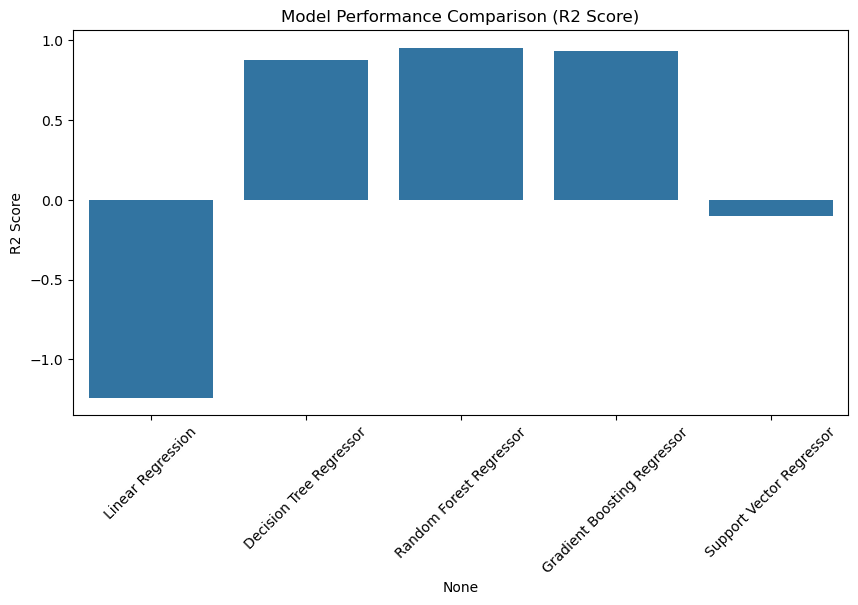

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.columns, y=results_df.loc['R2 Score'])
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (R2 Score)")
plt.show()


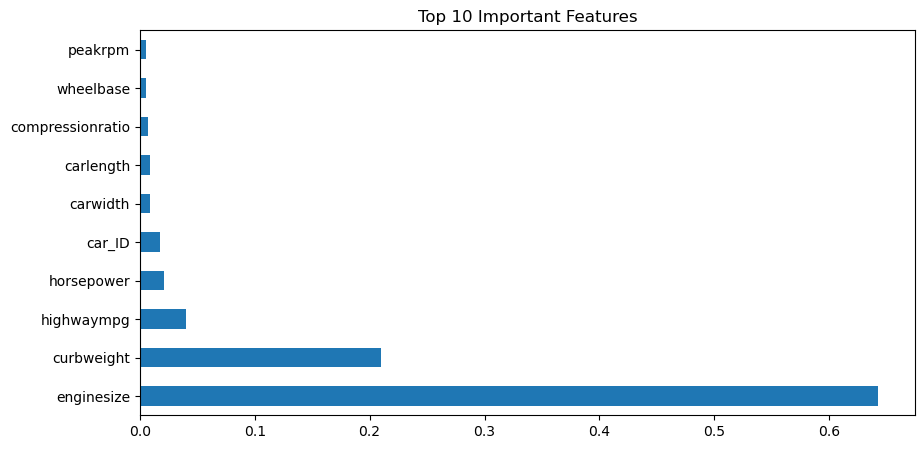

In [16]:
importances = RandomForestRegressor().fit(X, y).feature_importances_

# Convert into pandas Series
feature_importance_df = pd.Series(importances, index=X.columns)

# Plot top 10 important features
plt.figure(figsize=(10, 5))
feature_importance_df.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

gscv = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
gscv.fit(X_train, y_train)

best_params = gscv.best_params_
print("Best Parameters for Random Forest:", best_params)


Best Parameters for Random Forest: {'max_depth': 30, 'n_estimators': 200}


In [19]:
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Recalculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Improved Model Performance:")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


Improved Model Performance:
R2 Score: 0.9559126216387296
MSE: 3480434.9178815004
MAE: 1303.0822682926828
